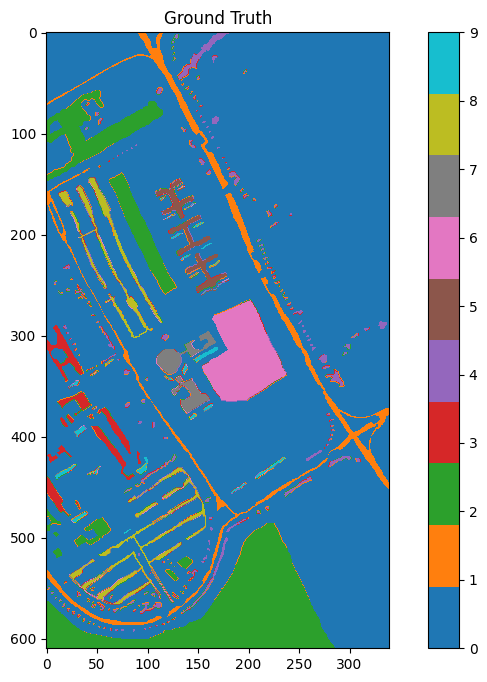

In [16]:
import scipy.io
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


 
image_path = 'C:\\Users\\30674\\Desktop\\dts201 pattern revognition\\Team Coursework\\DTS201TC CW DATASET\\PaviaU' 
gt_path ='C:\\Users\\30674\\Desktop\\dts201 pattern revognition\\Team Coursework\\DTS201TC CW DATASET\\PaviaU_gt'  
# read the image data form mat file
image = scipy.io.loadmat(image_path)
image = image['paviaU']

#read the ground truth data form mat file
ground_truth = scipy.io.loadmat(gt_path)
ground_truth = ground_truth['paviaU_gt'] # 读取ground truth数据

cmap = plt.get_cmap('tab10')  #use the tab10 color map

# plot the ground truth
plt.figure(figsize=(10, 8))
plt.imshow(ground_truth, cmap=cmap, vmin=0, vmax=9)
plt.colorbar()
plt.title('Ground Truth')
plt.show()

In [17]:


#flatten the image into a one-dimensional vector
image_data = image.reshape(-1, 103)
print(image_data.shape)


#flatten the ground truth into a one-dimensional vector 
gt_data = ground_truth.reshape(-1)
non_zero_indices = np.where(gt_data != 0)

#remove the background pixels(gt_data = 0)
image_data= image_data[non_zero_indices]
image_data_copy = image_data.copy()
gt_data = gt_data[non_zero_indices]
print(min(gt_data))

(207400, 103)
1


In [18]:
scaler = StandardScaler()
image_data = scaler.fit_transform(image_data)

In [19]:

#use random forest classifier to get the feature importance
best_n_estimators = 100
best_num_features = 0
num_features_list = []
best_select_features = None
for n in range(100,201,50):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(image_data, gt_data)

    
    #get the importance of each feature
    feature_importance = rf.feature_importances_

  
    #select the threshold for feature selection
    threshold = np.median(feature_importance)


    #select the features based on the threshold
    selected_features = np.where(feature_importance > threshold)[0]
    
    num_features_list.append(len(selected_features))

    # 检查n_estimators是否给出了更多的选定特征
    #check if n_estimators gives more selected features
    if len(selected_features) > best_num_features:
        best_num_features = len(selected_features)
        best_n_estimators = n
        best_select_features = selected_features


print(f"the best n_estimators is {best_n_estimators}, select {best_num_features} features")
image_data = image_data[:, best_select_features]


the best n_estimators is 100, select 51 features


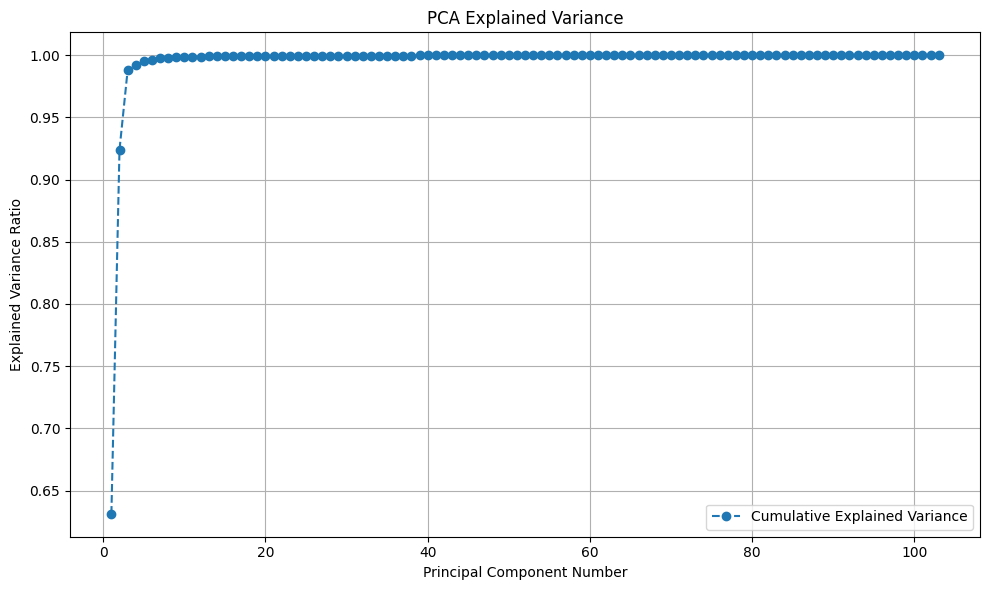

In [24]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt




# Perform PCA on the data
pca = PCA()
pca.fit(image_data)

# Extract the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance for different components
plt.figure(figsize=(10,6))
#plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(np.arange(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Perform PCA on the data
pca = PCA(n_components=2)
image_data_pca = pca.fit_transform(image_data)# 读取图像


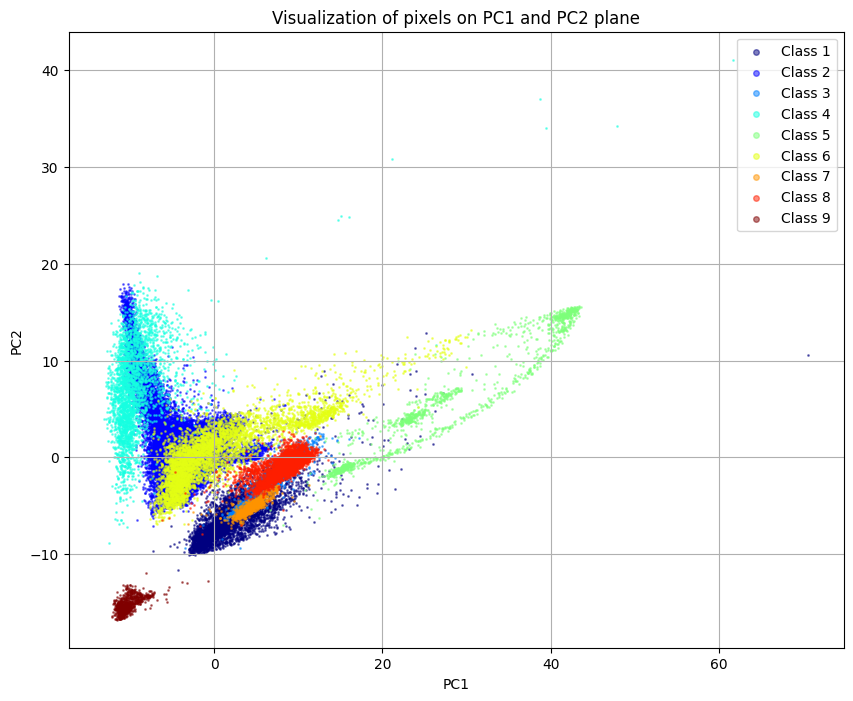

In [26]:
# Plotting the data on the first two principal components
unique_classes = np.unique(gt_data)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))
plt.figure(figsize=(10, 8))
for i, cl in enumerate(unique_classes):
    plt.scatter(image_data_pca[gt_data == cl, 0], 
                image_data_pca[gt_data == cl, 1], 
                
                color=colors[i], 
                alpha=0.5, 
                s=1, 
                label=f"Class {cl}")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of pixels on PC1 and PC2 plane')
plt.grid(True)
plt.legend(markerscale=4, loc='upper right')
plt.show()

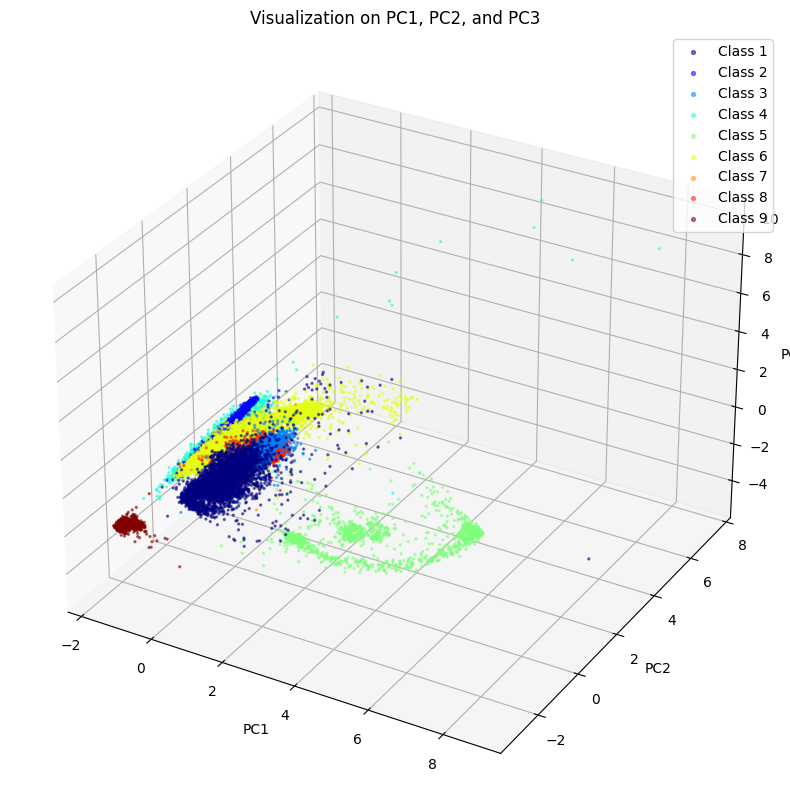

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting the data on the first three principal components
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(image_data)

scaler = StandardScaler()
data_pca_3d = scaler.fit_transform(data_pca_3d)  # Corrected this line

# Plotting in 3D space
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, cl in enumerate(unique_classes):
    ax.scatter(data_pca_3d[gt_data == cl, 0], 
               data_pca_3d[gt_data == cl, 1], 
               data_pca_3d[gt_data == cl, 2], 
               color=colors[i], 
               alpha=0.5, 
               s=2, 
               label=f"Class {cl}")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualization on PC1, PC2, and PC3')
ax.legend(markerscale=2, loc='upper right')
plt.show()
